#### M5_Challenge_KonradK_financial_planning_tools.ipynb
# Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
---

# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [5]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import datetime
import click
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
# Load the environment variables from the .env file by calling the load_dotenv function.
load_dotenv()

True

## Part 0: Confirm Important Information About the Member's Portfolio

In [27]:
print("Please take a moment to confirm the following information about the member's portfolio: \n ")

btc_coins = click.prompt("1) BITCOIN \nEnter the number of BTC Coins in the portfolio \n     [press ENTER for default value of", type=float, default=1.2) 
print(btc_coins)
eth_coins = click.prompt("\n \n \n \n2) ETHEREUM \nEnter the number of ETH Coins in the portfolio \n     [press ENTER for default value of", type=float, default=5.3) 
print(eth_coins)
monthly_income = click.prompt("\n \n \n \n3) INCOME \nPlease enter the member's current monthly income \nor projected monthly expenses \n     [press ENTER for default value of", type=float, default=12000) 
print(monthly_income)
spy_shares = click.prompt("\n \n \n \n4) STOCKS \nEnter the number of S&P 500 Stock holdings in \nthe portfolio \n     [press ENTER for default value of", type=float, default=110) 
print(spy_shares)
agg_shares = click.prompt("\n \n \n \n5) BONDS \nEnter the number of iShares Bond ETF holdings in \nthe portfolio \n     [press ENTER for default value of", type=float, default=200) 
print(agg_shares)
reserve_months = click.prompt("\n \n \n \n6) RESERVES \nPlease enter the member's desired months in reserves \n     [press ENTER for default value of", type=float, default=3) 
print(reserve_months)

print("\n \n \n \n<<  FEATURES CURRENTLY UNDER CONSTRUCTION: >>\n ")

print("        -> 7) conditional statement for `use_for_today_date`")
#    (reference in README.md)
#    Boolean test for `close = NaN`")
#    confirm that `use_for_today_date` is an open trading day ⚠️
#    elif for `NaN`s
#    date_to_use_today = if click(ans) == today_date then return today_date, else return three_days_ago
#    ref. Module_2

print("\n\n        -> 8) Risk_Tolerance Query") 
#      1:5 (and 0, 666), 
#      SPY/AGG,
#        0: 0/100
#        1: 20/80
#        2: 40/60
#        3: 60/40 [default]
#        4: 80/20
#        5: 100/0
#        666: all on crypto?... Run MC_Sims on Crypto returns

print("\n\n        -> 9) Save a log of i/o for every instance the script is run")

print("\n \n \n \n")

Please take a moment to confirm the following information about the member's portfolio: 
 
1) BITCOIN 
Enter the number of BTC Coins in the portfolio 
     [press ENTER for default value of [1.2]: 

1.2

 
 
 
2) ETHEREUM 
Enter the number of ETH Coins in the portfolio 
     [press ENTER for default value of [5.3]: 

5.3

 
 
 
3) INCOME 
Please enter the member's current monthly income 
or projected monthly expenses 
     [press ENTER for default value of [12000]: 

12000

 
 
 
4) STOCKS 
Enter the number of S&P 500 Stock holdings in 
the portfolio 
     [press ENTER for default value of [110]: 

110

 
 
 
5) BONDS 
Enter the number of iShares Bond ETF holdings in 
the portfolio 
     [press ENTER for default value of [200]: 

200

 
 
 
6) RESERVES 
Please enter the member's desired months in reserves 
     [press ENTER for default value of [3]: 

3

 
 
 
<<  FEATURES CURRENTLY UNDER CONSTRUCTION: >>
 
        -> 7) conditional statement for `use_for_today_date`


        -> 8) Risk_Tolerance Query


        -> 9) Save a log of i/o for every instance the script is run

 
 
 



## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [11]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
# btc_coins = 1.2
# eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [12]:
# The monthly amount for the member's household income
# monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [13]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [14]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18619581,
            "id": 1,
            "last_updated": 1612485635,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 691094976213,
                    "percent_change_1h": 0.671542569218053,
                    "percent_change_24h": -1.95266461979834,
                    "percent_change_7d": 12.0297559000421,
                    "percentage_change_1h": 0.671542569218053,
                    "percentage_change_24h": -1.95266461979834,
                    "percentage_change_7d": 12.0297559000421,
                    "price": 37114.0,
                    "volume_24h": 53271384245
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18619581,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [15]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 114538770,
            "id": 1027,
            "last_updated": 1612485763,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 184112127868,
                    "percent_change_1h": 0.432750565237048,
                    "percent_change_24h": -3.2425936330233,
                    "percent_change_7d": 21.4085730143323,
                    "percentage_change_1h": 0.432750565237048,
                    "percentage_change_24h": -3.2425936330233,
                    "percentage_change_7d": 21.4085730143323,
                    "price": 1613.25,
                    "volume_24h": 43024692079
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 114538770,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [16]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for BTC is ${btc_price:,.2f}")

The price for BTC is $37,114.00


In [17]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for ETH is ${eth_price:,.2f}")


The price for ETH is $1,613.25


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [18]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of the total Bitcoin (BTC) holding is ${btc_value:,.2f}")

The current value of the total Bitcoin (BTC) holding is $44,536.80


In [19]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of the total Ethereum (ETH) holding is ${eth_value:,.2f}")

The current value of the total Ethereum (ETH) holding is $8,550.23


In [20]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total value of the entire cryptocurrency wallet is ${total_crypto_wallet:,.2f}")

The total value of the entire cryptocurrency wallet is $53,087.02


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [21]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
# spy_shares = 110
# agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [23]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [28]:
today_date = str(datetime.datetime.now()).split()[0]
three_days_ago = str(datetime.datetime.now() - datetime.timedelta(days=3)).split()[0]

one_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=1*365)).split()[0]
three_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]
ten_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=10*365)).split()[0]

today_date, three_days_ago, one_year_ago, three_year_ago, ten_year_ago

('2021-02-04', '2021-02-01', '2020-02-05', '2018-02-05', '2011-02-07')

In [29]:
use_for_today_date = today_date

In [30]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp(use_for_today_date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(use_for_today_date, tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [31]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Review the first 5 rows of the Alpaca DataFrame 
prices_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-02-04 00:00:00-05:00  116.75  116.89  116.69  116.86  5128808  382.96   

                                                               
                             high       low   close    volume  
time                                                           
2021-02-04 00:00:00-05:00  386.24  381.9655  386.17  40030930

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [32]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"AGG    ${agg_close_price: .2f}")
print(type(agg_close_price)) # YOUR CODE HERE


AGG    $ 116.86
<class 'float'>


In [33]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"SPY    ${spy_close_price: .2f}")
print(type(spy_close_price)) 

SPY    $ 386.17
<class 'float'>


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [34]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"Current Value of the Bond Portfolio:            ${agg_value:,.2f}")

Current Value of the Bond Portfolio:            $23,372.00


In [35]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"Current Value of the Stock Portfolio:            ${spy_value:,.2f}")

Current Value of the Stock Portfolio:            $42,478.70


In [36]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Total Value of the Stock/Bond Portion of the Portfolio:            ${total_stocks_bonds:,.2f}")

Total Value of the Stock/Bond Portion of the Portfolio:            $65,850.70


In [37]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"Total Value of Entire Portfolio (Stocks/Bonds & Crypto):            ${total_portfolio:,.2f}")

Total Value of Entire Portfolio (Stocks/Bonds & Crypto):            $118,937.73


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [38]:
# Consolidate financial assets data into a Python list
savings_data = ["Crypto", "Stock/Bond"] 

# Review the Python list savings_data
savings_data    

['Crypto', 'Stock/Bond']

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [39]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    {'Amount':[total_crypto_wallet, total_stocks_bonds]},
    index=savings_data
)

# Display the savings_df DataFrame
savings_df

,Amount
Crypto,53087.025
Stock/Bond,65850.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - Crypto v. Stock/Bond Holdings'}, ylabel='Amount'>

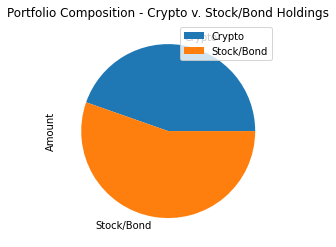

In [40]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', title='Portfolio Composition - Crypto v. Stock/Bond Holdings')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [41]:
# reserve_months = 3

# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * reserve_months

emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [42]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations!!! You have enough money in this fund for your goal of a {reserve_months} month reserve, plus an additional {((total_portfolio / monthly_income) - reserve_months):,.2f} months.")
if total_portfolio == emergency_fund_value: 
    print(f"Great Work!! You've reached this important financial goal of having a {reserve_months} month reserve.")
if total_portfolio < emergency_fund_value:
    print(f"Way to go! Only ${(emergency_fund_value - total_portfolio):,.2f} away from reaching your goal of having {reserve_months} months' expenses for an emergency fund.")

Congratulations!!! You have enough money in this fund for your goal of a 3 month reserve, plus an additional 6.91 months.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [43]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
start_date = pd.Timestamp(ten_year_ago, tz="America/New_York").isoformat()
end_date = pd.Timestamp(use_for_today_date, tz="America/New_York").isoformat()


In [44]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
prices_df.tail() 

AGG                                     \
                               open     high     low   close    volume   
time                                                                     
2020-09-14 00:00:00-04:00  118.4700  118.490  118.31  118.37  11279340   
2020-09-15 00:00:00-04:00  118.2900  118.425  118.29  118.38   3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.20  118.32   5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.33  118.36   4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.18  118.24   4548578   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-09-14 00:00:00-04:00  337.49  340.3800  334.2208  338.42  110083883  
2020-09-15 00:00:00-04:00  341.12  342.0200  338.4683  340.15   43908367  
2020-09-16 00:00:00-04:00  341.51  343.0600  338.5200  338.81   70521698  
2020-09-17 00:00:00-04:00  333.56  337.6996  332.9910  335.86   80778657  
2020-09-18 00:00:00-04:00  335.37  335.4900  327.9700  330.69   88780313

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   
2021-02-03 00:00:00-05:00  116.9700  116.99  116.8700  116.89  5060310   
2021-02-04 00:00:00-05:00  116.7500  116.89  116.6900  116.86  5128808   

                               SPY                                       
                              open    high       low   close     volume  
time                                                                     
2021-01-29 00:00:00-05:00  375.630  376.67  368.2700  370.19  106397082  
2021-02-01 00:00:00-05:00  373.720  377.34  370.3760  376.18   64056510  
2021-02-02 00:00:00-05:00  379.650  383.22  376.3181  381.54   53979346  
2021-02-03 00:00:00-05:00  382.435  383.70  380.4800  381.86   43305661  
2021-02-04 00:00:00-05:00  382.960  386.24  381.9655  386.17   40030930

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [45]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_trad_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_trad_weight.portfolio_data.head()


AGG                                     \
                               open     high     low   close    volume   
time                                                                     
2020-09-14 00:00:00-04:00  118.4700  118.490  118.31  118.37  11279340   
2020-09-15 00:00:00-04:00  118.2900  118.425  118.29  118.38   3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.20  118.32   5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.33  118.36   4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.18  118.24   4548578   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-14 00:00:00-04:00          NaN  337.49  340.3800  334.2208  338.42   
2020-09-15 00:00:00-04:00     0.000084  341.12  342.0200  338.4683  340.15   
2020-09-16 00:00:00-04:00    -0.000507  341.51  343.0600  338.5200  338.81   
2020-09-17 00:00:00-04:00     0.000338  333.56  337.6996  332.9910  335.86   
2020-09-18 00:00:00-04:00    -0.001014  335.37  335.4900  327.9700  330.69   

                                                   
                              volume daily_return  
time                                               
2020-09-14 00:00:00-04:00  110083883          NaN  
2020-09-15 00:00:00-04:00   43908367     0.005112  
2020-09-16 00:00:00-04:00   70521698    -0.003939  
2020-09-17 00:00:00-04:00   80778657    -0.008707  
2020-09-18 00:00:00-04:00   88780313    -0.015393

In [46]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_trad_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998522,0.996968,1.001410,0.998345,1.000204,1.003368,1.005276,1.004420,1.007659,0.992402,...,1.001845,1.000071,1.001321,0.999199,0.997150,0.996696,1.000261,1.004428,0.998742,1.004037
2,0.999690,0.997518,1.000384,0.996459,0.998281,1.002050,1.006152,1.008379,1.008886,0.998051,...,1.008830,1.007332,0.998868,0.996226,0.997280,0.994071,1.002133,1.005955,0.996550,1.004352
3,1.002623,0.998985,0.996687,1.001719,0.991471,0.999642,1.007660,1.008163,1.012382,0.999153,...,1.009466,1.005604,1.003141,0.998748,0.998374,0.997311,1.003305,1.006583,0.999785,1.003302
4,1.001125,1.003985,0.995744,1.002783,0.993865,0.994548,1.007025,1.006068,1.003541,1.001528,...,1.003656,1.012111,1.005842,1.000537,1.001076,1.007264,1.007527,1.005680,1.003292,1.003733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,49.776348,37.920390,57.037096,25.145467,27.609164,42.831525,32.731750,21.316936,35.130380,32.678043,...,23.188217,60.266546,30.538756,28.081711,24.932083,19.466449,33.793851,33.711054,29.590311,41.382437
7557,49.763180,38.045944,57.203662,25.159185,27.711711,42.844088,32.651824,21.465811,35.125286,32.773259,...,23.093135,60.454460,30.552463,27.877860,25.148943,19.477689,33.804041,33.709693,29.784127,41.737018
7558,49.542518,37.964441,57.479460,25.059871,27.764291,42.489572,32.726522,21.463906,34.983978,32.887878,...,22.968799,61.031163,30.576602,27.980890,25.257278,19.512532,34.080086,33.910142,29.893363,41.799689
7559,49.650278,38.151453,57.650911,25.019953,27.804099,42.108156,33.048461,21.392433,35.138813,32.709010,...,22.934917,61.258741,30.460412,27.926940,25.317026,19.343342,33.904553,33.943816,29.824611,41.868599


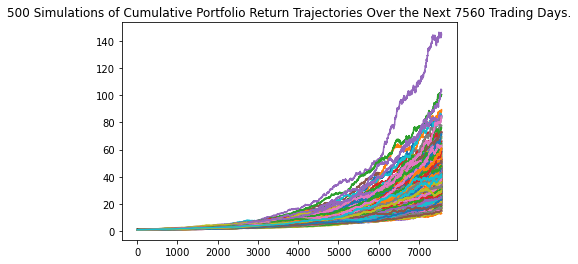

In [48]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
trad_weight_line_plot = MC_trad_weight.plot_simulation()

# Save the plot for future use
trad_weight_line_plot.get_figure().savefig("MC_trad_weight_line_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

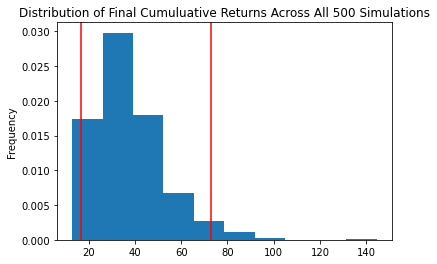

In [49]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
trad_weight_distribution_plot = MC_trad_weight.plot_distribution()

# Save the plot for future use
trad_weight_distribution_plot.get_figure().savefig('MC_trad_weight_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [50]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
trad_weight_table = MC_trad_weight.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(trad_weight_table)

count           500.000000
mean             37.866404
std              15.413608
min              12.934231
25%              27.140825
50%              34.999401
75%              44.888557
max             144.406751
95% CI Lower     16.823055
95% CI Upper     72.760333
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [51]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Total Current Value of the Stock/Bond portion of the Portfolio:            ${total_stocks_bonds:,.2f}")

Total Current Value of the Stock/Bond portion of the Portfolio:            $65,850.70


In [52]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = trad_weight_table[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = trad_weight_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value ${total_stocks_bonds:,.2f}) in"
      f" a traditional 60/40 weight distribution over the next 30 years will result in a value within the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")


There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value $65,850.70) in a traditional 60/40 weight distribution over the next 30 years will result in a value within the range of $1,107,809.92 and $4,791,318.86.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [53]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_spy80_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_spy80_weight.portfolio_data.head()


AGG                                     \
                               open     high     low   close    volume   
time                                                                     
2020-09-14 00:00:00-04:00  118.4700  118.490  118.31  118.37  11279340   
2020-09-15 00:00:00-04:00  118.2900  118.425  118.29  118.38   3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.20  118.32   5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.33  118.36   4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.18  118.24   4548578   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-14 00:00:00-04:00          NaN  337.49  340.3800  334.2208  338.42   
2020-09-15 00:00:00-04:00     0.000084  341.12  342.0200  338.4683  340.15   
2020-09-16 00:00:00-04:00    -0.000507  341.51  343.0600  338.5200  338.81   
2020-09-17 00:00:00-04:00     0.000338  333.56  337.6996  332.9910  335.86   
2020-09-18 00:00:00-04:00    -0.001014  335.37  335.4900  327.9700  330.69   

                                                   
                              volume daily_return  
time                                               
2020-09-14 00:00:00-04:00  110083883          NaN  
2020-09-15 00:00:00-04:00   43908367     0.005112  
2020-09-16 00:00:00-04:00   70521698    -0.003939  
2020-09-17 00:00:00-04:00   80778657    -0.008707  
2020-09-18 00:00:00-04:00   88780313    -0.015393

In [54]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_spy80_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003014,1.000389,0.999033,0.999004,1.004326,0.998306,0.999668,1.000668,1.004961,0.999937,...,1.002815,1.004278,1.001991,1.004145,1.001741,0.997856,0.999921,0.999346,1.001685,1.002782
2,1.003486,1.003406,1.003780,0.997691,1.001645,1.003052,1.000735,0.998478,1.003541,1.005681,...,1.004893,1.005627,1.004577,1.006437,0.999338,0.993982,0.997411,1.000939,1.003800,1.003743
3,1.004957,1.005166,1.005660,0.996121,1.002174,1.002519,1.003150,0.999391,1.003176,1.005544,...,1.004939,1.006389,1.008339,1.004995,0.997974,0.990741,0.995130,1.003699,1.005181,1.002291
4,1.007478,1.008682,1.008973,0.997661,1.002963,0.998373,1.005950,1.000465,1.004566,1.003782,...,1.005324,1.004750,1.005878,1.006049,0.998952,0.993060,0.995115,0.999536,1.008296,1.003489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.482729,1.613040,1.389086,1.336292,1.183616,1.682117,1.553597,1.516168,1.457419,1.681247,...,1.430057,1.884568,1.610303,1.595966,1.346906,1.722908,1.706811,1.519677,1.788337,1.861951
2517,1.488276,1.614561,1.392023,1.334495,1.180753,1.683443,1.554540,1.507056,1.455141,1.687331,...,1.435947,1.886334,1.612786,1.598873,1.350831,1.715078,1.709686,1.523267,1.787672,1.857681
2518,1.486878,1.612137,1.389266,1.330853,1.180881,1.687528,1.554258,1.503047,1.457448,1.689525,...,1.441018,1.881146,1.606496,1.591940,1.350704,1.719163,1.716499,1.521048,1.789665,1.858225
2519,1.489832,1.611566,1.388785,1.329404,1.185493,1.689758,1.557941,1.498911,1.458123,1.686526,...,1.437705,1.870666,1.607116,1.589637,1.350737,1.719059,1.712987,1.520064,1.784713,1.850804


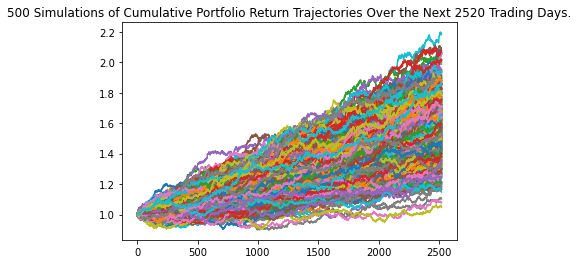

In [55]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
spy80_weight_line_plot = MC_spy80_weight.plot_simulation()

# Save the plot for future use
spy80_weight_line_plot.get_figure().savefig("MC_spy80_weight_line_plot.png", bbox_inches="tight")

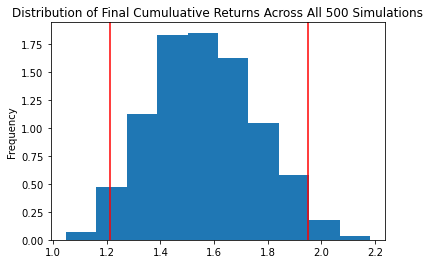

In [56]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
spy80_weight_distribution_plot = MC_spy80_weight.plot_distribution()

# Save the plot for future use
spy80_weight_distribution_plot.get_figure().savefig('MC_spy80_weight_dist_plot.png',bbox_inches='tight')

In [57]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
spy80_weight_table = MC_spy80_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(spy80_weight_table)

count           500.000000
mean              1.565634
std               0.195876
min               1.047193
25%               1.424805
50%               1.559378
75%               1.700068
max               2.182186
95% CI Lower      1.211719
95% CI Upper      1.948887
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [58]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Total Current Value of the Stock/Bond portion of the Portfolio:            ${total_stocks_bonds:,.2f}")

Total Current Value of the Stock/Bond portion of the Portfolio:            $65,850.70


In [59]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = spy80_weight_table[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = spy80_weight_table[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value ${total_stocks_bonds:,.2f}) in"
      f" a more aggressive 80/20 weight distribution over the next 10 years will result within the range of"
      f" ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f} in value.")


There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value $65,850.70) in a more aggressive 80/20 weight distribution over the next 10 years will result within the range of $79,792.55 and $128,335.54 in value.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [60]:
print("**Answer**")

print(f"It's very unlikely that weighting the portfolio more heavily towards stocks would allow the members to retire after only 10 years. With their current monthly expenses of ${monthly_income:,.2f}, there is up to a 95% chance they would only have enough in stock/bond retirement accounts to survive for maximum of {(ci_upper_ten_cumulative_return / monthly_income):,.2f} months, or {((ci_upper_ten_cumulative_return / monthly_income)/12):,.2f} years (without accounting for inflation).")

**Answer**
It's very unlikely that weighting the portfolio more heavily towards stocks would allow the members to retire after only 10 years. With their current monthly expenses of $12,000.00, there is up to a 95% chance they would only have enough in stock/bond retirement accounts to survive for maximum of 10.69 months, or 0.89 years (without accounting for inflation).
